<a href="https://colab.research.google.com/github/YasminDayrell/AAGIS/blob/main/traineePeriodo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Upload


In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_habits_performance.csv to student_habits_performance.csv


# Primeira Hipótese


In [2]:
import pandas as pd

df = pd.read_csv('student_habits_performance.csv')

#teste
df = df.drop("student_id", axis=1)
df.head(10)


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


Pela tabela percebe-se que as maiores notas são de mulheres mais de 4.7 horas de estudo por dia, dando a entender que essas variáveis serão as mais influentes. Dessa maneira imagino que os dados serão agrupados principalmente com relação à isso, pois os outros indicadores, a partir de uma análise rasa, parecem menos influentes. Também percebe-se que a coluna student_id não agrega em nada.

# Tratamento de Dados


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
def random_sample_imputation(df):

  cols_with_missing_values = df.columns[df.isna().any()].tolist()

  for var in cols_with_missing_values:

    # extract a random sample
    random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
    random_sample_df.index = df[
            df[var].isnull()].index

    # replace the NA
    df.loc[df[var].isnull(), var] = random_sample_df

  return df

#substituindo valores faltantes
df = random_sample_imputation(df)
categorical_columns = df.select_dtypes(include=['object'])
categoricalColumsName = categorical_columns.columns.tolist()

#Encoding
print(categoricalColumsName)

#Ordinal Enconding
print(df["diet_quality"].unique())
print(df["parental_education_level"].unique())
print(df["internet_quality"].unique())

orders = [["Good", "Fair", "Poor"],
          ["High School", "Bachelor", "Master"],
          ["Good", "Average", "Poor"],
         ]


ordinalColumns = ['diet_quality','parental_education_level', 'internet_quality']

OrdinalEncoder = OrdinalEncoder(categories=orders)

df[ordinalColumns] = OrdinalEncoder.fit_transform(df[ordinalColumns])

#label encoding
nominalColumns = ['gender','part_time_job', 'extracurricular_participation']

label_encoder = LabelEncoder()

for col in nominalColumns:
  df[col] = label_encoder.fit_transform(df[col])

df.head()

['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
['Fair' 'Good' 'Poor']
['Master' 'High School' 'Bachelor']
['Average' 'Poor' 'Good']


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,1.0,6,2.0,1.0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,0.0,6,0.0,1.0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2.0,1,0.0,2.0,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2.0,4,2.0,0.0,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,1.0,3,2.0,0.0,1,0,66.4


# Análise exploratória


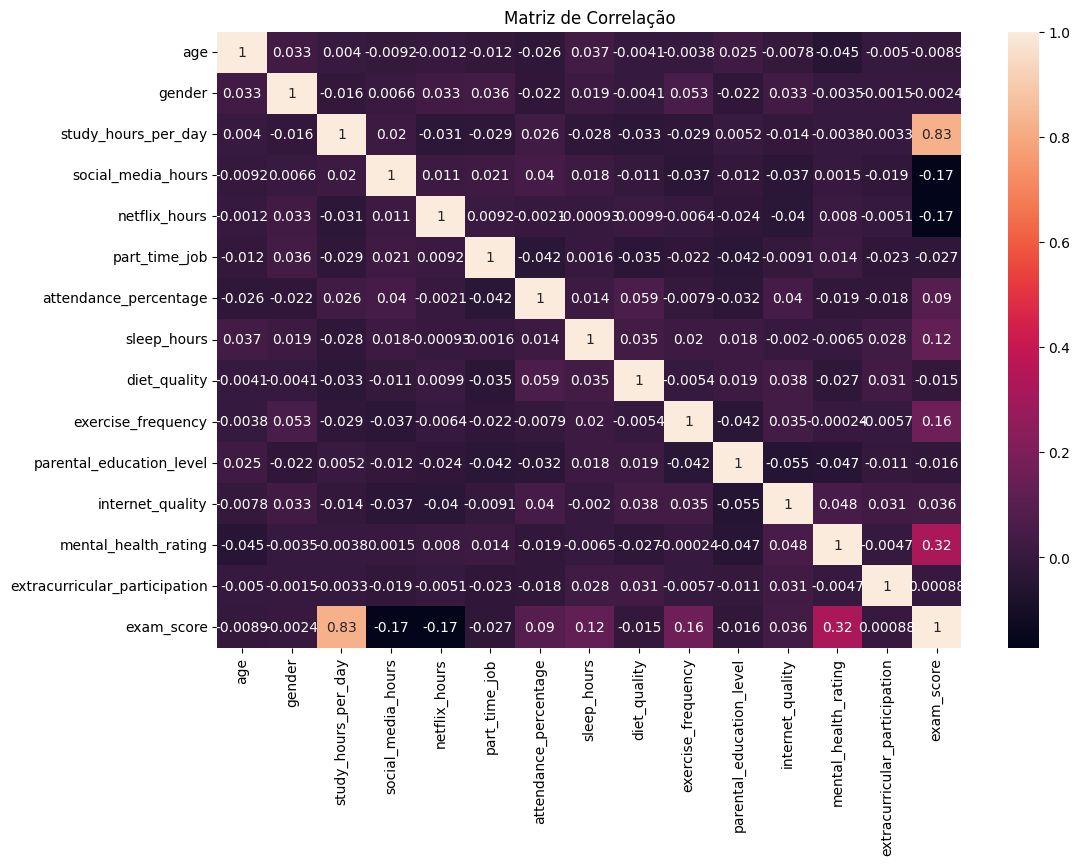


percebemos que as variáveis mais influentes são:
1-study_hours_per_day
2-mental_health_rating
3-netflix_hours/social_media_hours
4-exercise_frequency
5-sleep_hours


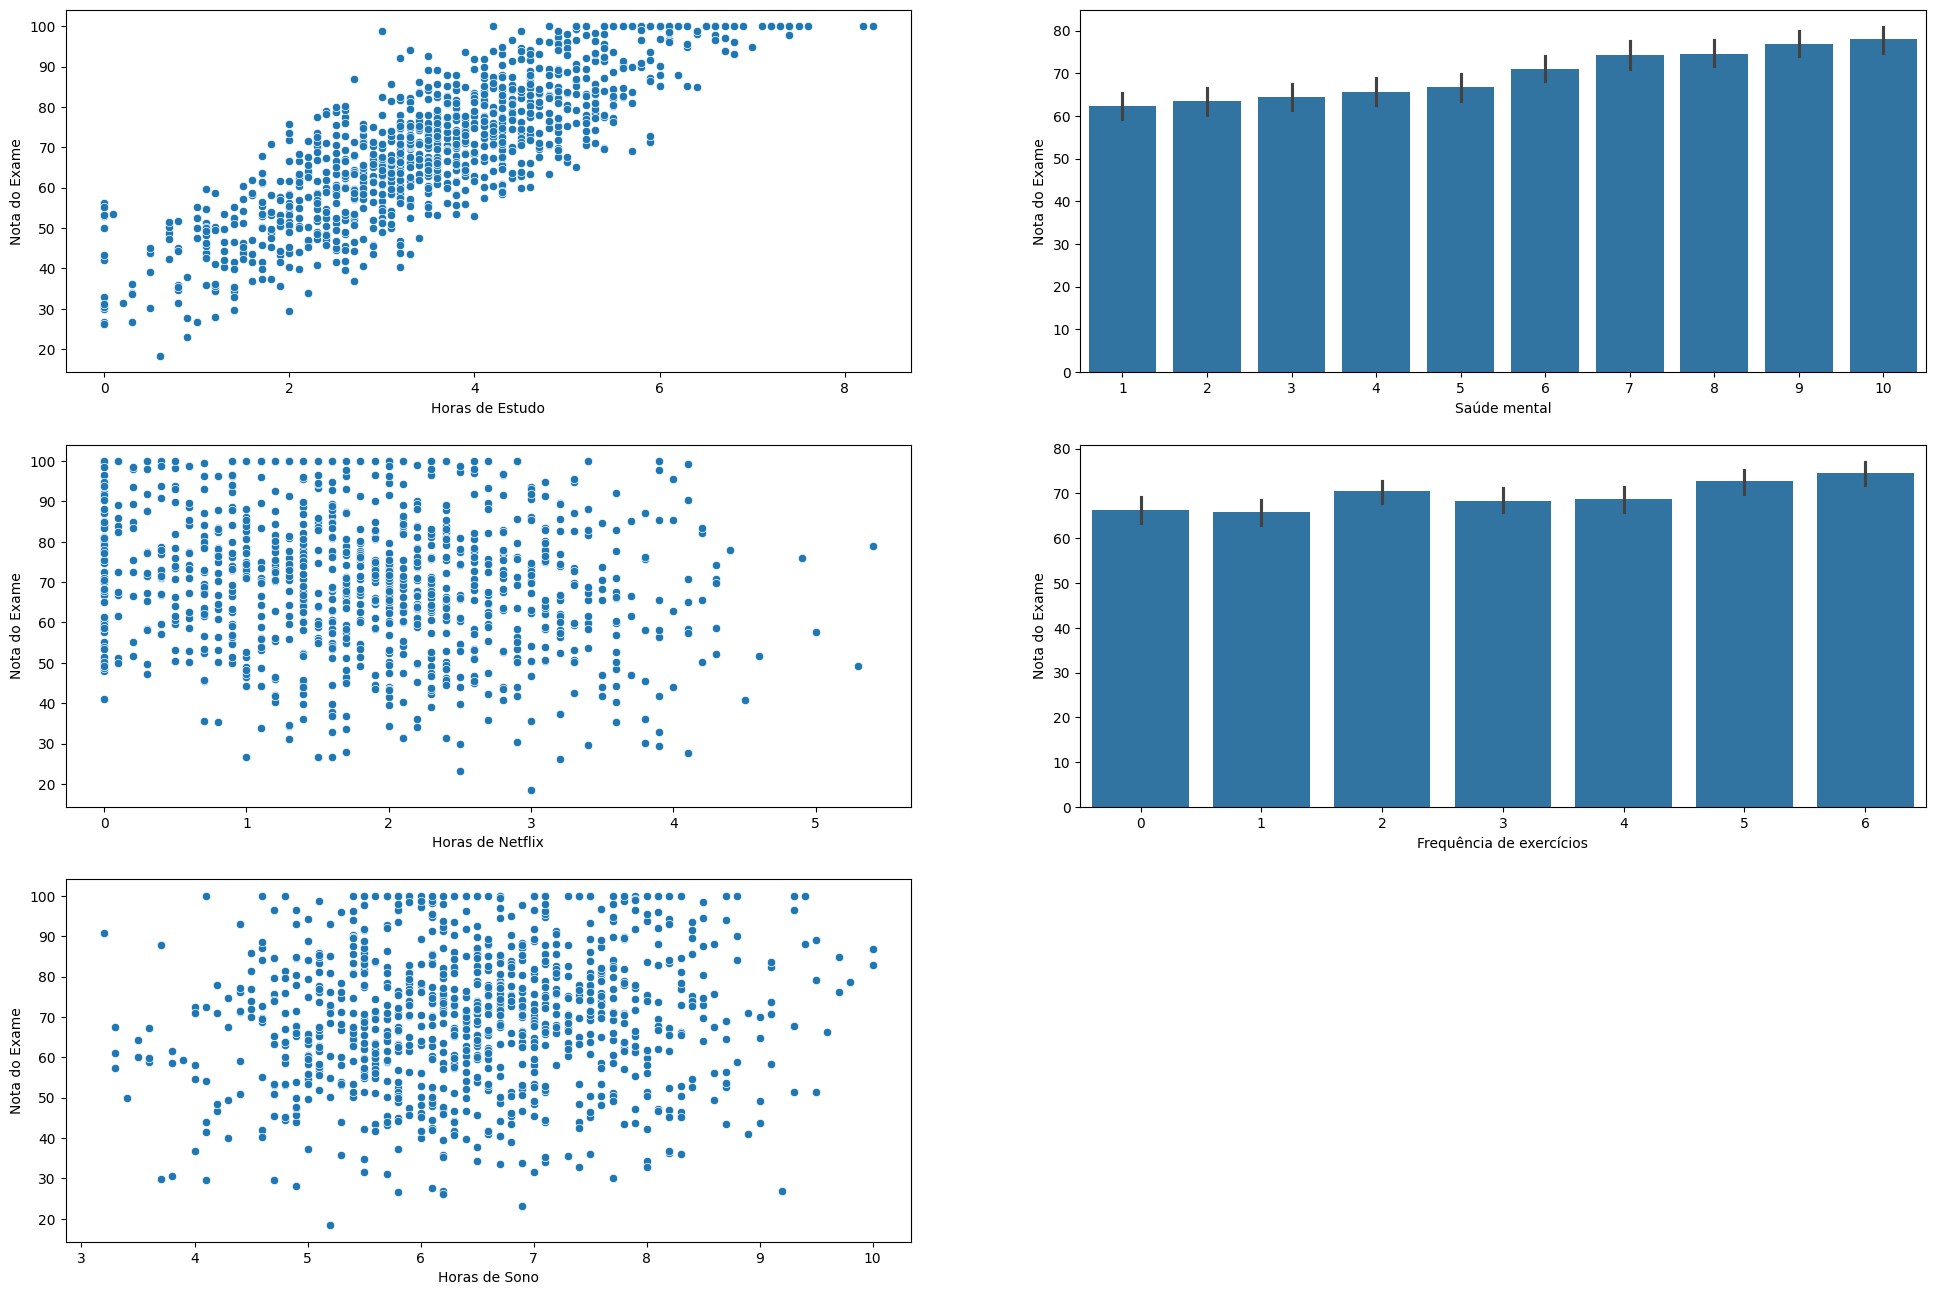

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Heatmap da matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()


print("""\npercebemos que as variáveis mais influentes são:
1-study_hours_per_day
2-mental_health_rating
3-netflix_hours/social_media_hours
4-exercise_frequency
5-sleep_hours""")

max_x = df['study_hours_per_day'].max()

plt.figure(figsize=(24,16))
plt.subplot(3,2,1)

sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota do Exame')


plt.subplot(3,2,2)
sns.barplot(x='mental_health_rating', y='exam_score', data=df)
plt.xlabel('Saúde mental')
plt.ylabel('Nota do Exame')

plt.subplot(3,2,3)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.xlabel('Horas de Netflix')
plt.ylabel('Nota do Exame')

plt.subplot(3,2,4)
sns.barplot(x='exercise_frequency', y='exam_score', data=df)
plt.xlabel('Frequência de exercícios')
plt.ylabel('Nota do Exame')

plt.subplot(3,2,5)
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.xlabel('Horas de Sono')
plt.ylabel('Nota do Exame')

plt.show()


Ao analizar os gráficos e os coeficiente percebece que a relação entre a nota e as horas de estudo são é muito maior do que qualquer outra variável. Logo, estimo que clusters estarão relacionados as horas de estudo. Talvez cerca de 5 clusters.

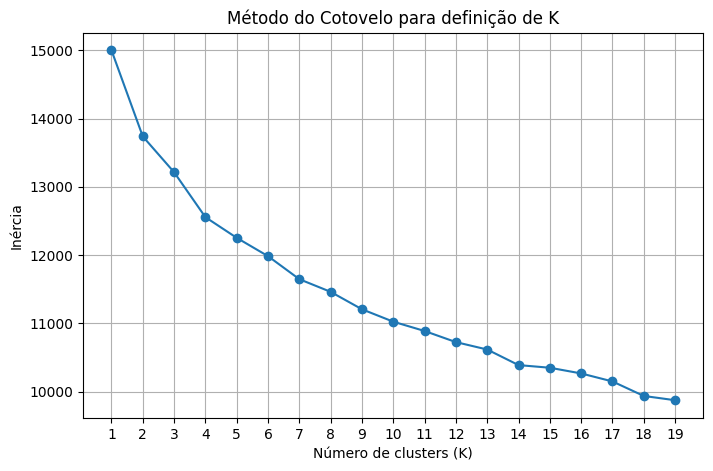

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponha que você já tenha carregado seu dataframe (por exemplo, df)
# Padronize os dados se ainda não fez
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df)

# Testa vários valores de K
inercia = []
valores_k = range(1, 11
                  )

for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(valores_k, inercia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para definição de K')
plt.xticks(valores_k)
plt.grid(True)
plt.show()


a partir de 4 o gráfico fica aproximadamente linear, então vamos fixar k = 4, utilizando o método do cotuvelo.

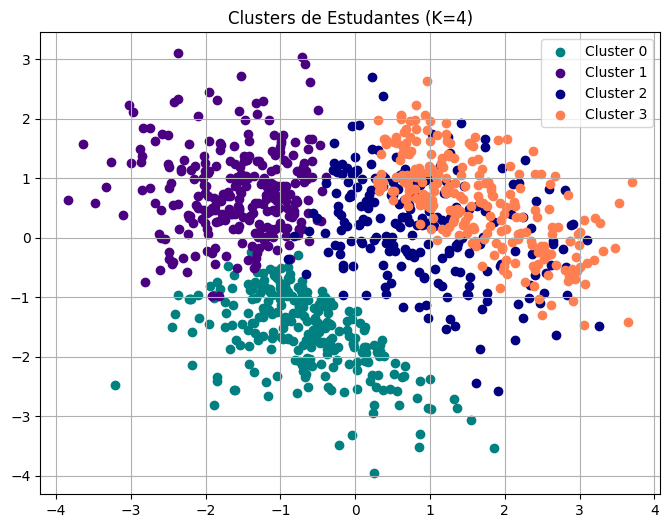

<ipython-input-40-c04261b90192>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='exam_score', data=df, palette=colors)


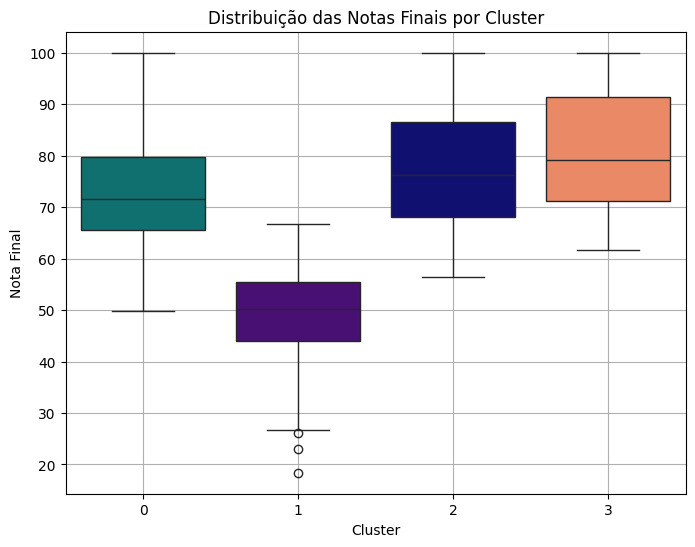

In [40]:
# Escolher 4 pontos aleatórios para serem os centros dos grupos (chamamos de "centróides").
# Colocar cada ponto no grupo do centróide mais próximo.
# Mover os centróides para o meio dos pontos do seu grupo.
# Repetir os passos 2 e 3 até os grupos não mudarem mais.
import numpy as np
def k_means(X, k, max_iter=100):
    np.random.seed(0)  # Define uma semente fixa

    # Escolhe aleatoriamente k índices de pontos da matriz
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]  # centróides iniciais

    for _ in range(max_iter):

        # 2.1 Atribuir cada ponto ao cluster mais próximo
        labels = []  # armazenar o grupo de cada ponto

        for point in X:
            # Calcula a distância do ponto para cada centróide
            distances = [np.linalg.norm(point - c) for c in centroids]

            # Encontra o índice (grupo) do centróide mais próximo e adiciona à lista
            labels.append(np.argmin(distances))

        labels = np.array(labels)

        new_centroids = []  # Lista para os novos centróides

        for i in range(k):
            # Seleciona todos os pontos que pertencem ao cluster i
            group_points = X[labels == i]

            # Calcula a média dos pontos do cluster para encontrar o novo centróide
            new_centroids.append(group_points.mean(axis=0))

        # Converte para array
        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break  # Convergiu

        # Se não convergiu, atualiza os centróides e repete o processo
        centroids = new_centroids

    return centroids, labels


def plotResult(k, x, colors):
  from matplotlib.patches import Patch
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(x)

  plt.figure(figsize=(8, 6))
  for i in range(k):
      plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', color=colors[i])
  plt.title(f'Clusters de Estudantes (K={k})')
  plt.legend()
  plt.grid(True)
  plt.show()

  df['Cluster'] = labels  # Adiciona o resultado do k-means
  df.head()

  plt.figure(figsize=(8, 6))

  sns.boxplot(x='Cluster', y='exam_score', data=df, palette=colors)
  plt.title('Distribuição das Notas Finais por Cluster')
  plt.xlabel('Cluster')
  plt.ylabel('Nota Final')
  plt.grid(True)
  plt.show()





from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X = df.drop("exam_score", axis=1) #usando todas os resultado ficam muito dispersos, logo irei diminuir o ruído
x = df[["study_hours_per_day","mental_health_rating","netflix_hours","social_media_hours","exercise_frequency","sleep_hours"]]
k = 4
x_scaled = scaler.fit_transform(df)
centroids, labels = k_means(x_scaled, k)

from sklearn.decomposition import PCA
colors = ['teal',"indigo" ,"navy" ,"coral"]
# Plotar os clusters
plotResult(k ,x_scaled, colors)

percebe-se que dois clustes ficaram sobrepostos, então vamos tentar com 3

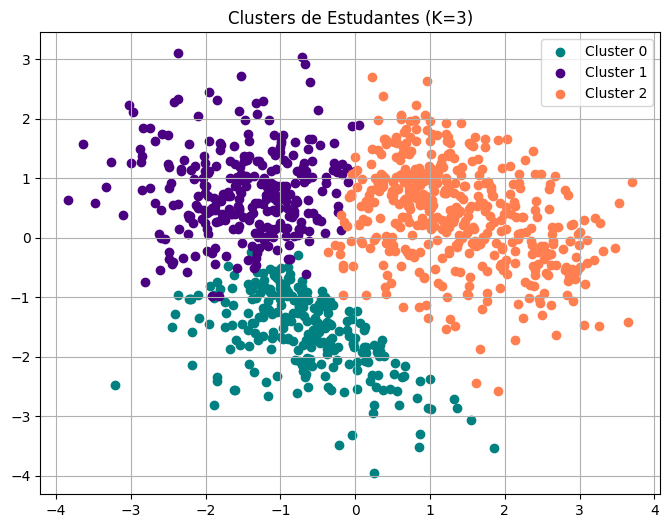

<ipython-input-40-c04261b90192>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='exam_score', data=df, palette=colors)


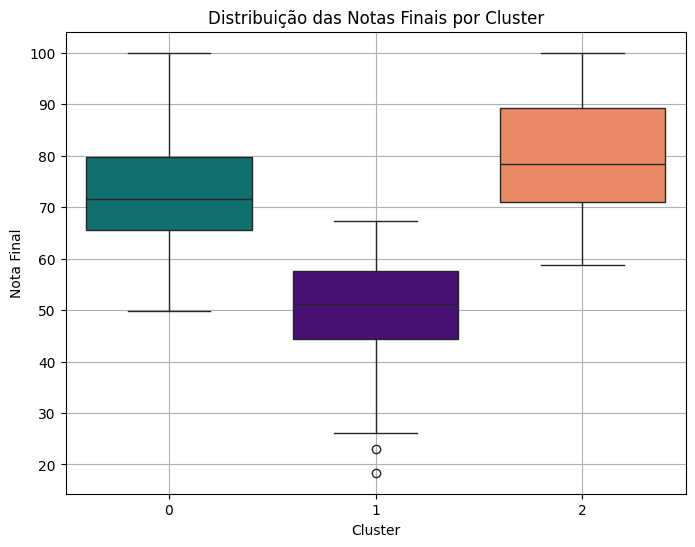

In [47]:
k = 3
colors = ['teal',"indigo" ,"coral"]
centroids, labels = k_means(x_scaled, k)
plotResult(k ,x_scaled, colors)



Revise as hipóteses levantadas no exercício 1 e 2 e com base no algoritmo
desenvolvido, apresente análise crítica a respeito das informações extraídas
dos dados caso o algoritmo refute ou confirme suas hipóteses:

Percebe-se que a quantidade de divisões de clusters nada teve a ver com a divisão de gurpos por nota como (grupo 1: nota 10, grupo 2 : nota 9, grupo 3: nota *8 ...).

Já em relação ao método do cotovelo ele foi bem preciso, em que minha análise errou K por 1.

Dessa maeira foi reforçado que o conceito de clusters não se refere necessáriamente a uma característica específica, e sim a similaridade geral entre os indivíduos. Ficando assim mais claro a ideia e sua aplicação.